In [1]:
import numpy as np

# importing data
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# warnings
import warnings 
warnings.filterwarnings("ignore")

# scaling
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics.pairwise import cosine_similarity

# KMeans cluster
from sklearn.cluster import KMeans
from kneed import KneeLocator

# PCA
from sklearn.decomposition import PCA

In [2]:
# !pip install pandas_profiling
!pip install kneed

In [3]:
data1 = pd.read_csv ("E:/ML course/4- ML/Data/42- PCA- clustering p/Country-data.csv")      ### Calling Data
data1

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [4]:
df = pd.DataFrame(data1)                    ### making Dataframe
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.describe(include='all')

country  child_mort     exports      health     imports  \
count           167  167.000000  167.000000  167.000000  167.000000   
unique          167         NaN         NaN         NaN         NaN   
top     Afghanistan         NaN         NaN         NaN         NaN   
freq              1         NaN         NaN         NaN         NaN   
mean            NaN   38.270060   41.108976    6.815689   46.890215   
std             NaN   40.328931   27.412010    2.746837   24.209589   
min             NaN    2.600000    0.109000    1.810000    0.065900   
25%             NaN    8.250000   23.800000    4.920000   30.200000   
50%             NaN   19.300000   35.000000    6.320000   43.300000   
75%             NaN   62.100000   51.350000    8.600000   58.750000   
max             NaN  208.000000  200.000000   17.900000  174.000000   

               income   inflation  life_expec   total_fer           gdpp  
count      167.000000  167.000000  167.000000  167.000000     167.000000  
unique            NaN         NaN         NaN         NaN            NaN  
top               NaN         NaN         NaN         NaN            NaN  
freq              NaN         NaN         NaN         NaN            NaN  
mean     17144.688623    7.781832   70.555689    2.947964   12964.155689  
std      19278.067698   10.570704    8.893172    1.513848   18328.704809  
min        609.000000   -4.210000   32.100000    1.150000     231.000000  
25%       3355.000000    1.810000   65.300000    1.795000    1330.000000  
50%       9960.000000    5.390000   73.100000    2.410000    4660.000000  
75%      22800.000000   10.750000   76.800000    3.880000   14050.000000  
max     125000.000000  104.000000   82.800000    7.490000  105000.000000

In [7]:
df.isnull().sum()          # no missing value

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df2 = df.drop(["country"], axis=1)       # we dont need 'CUST_ID'
df2

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

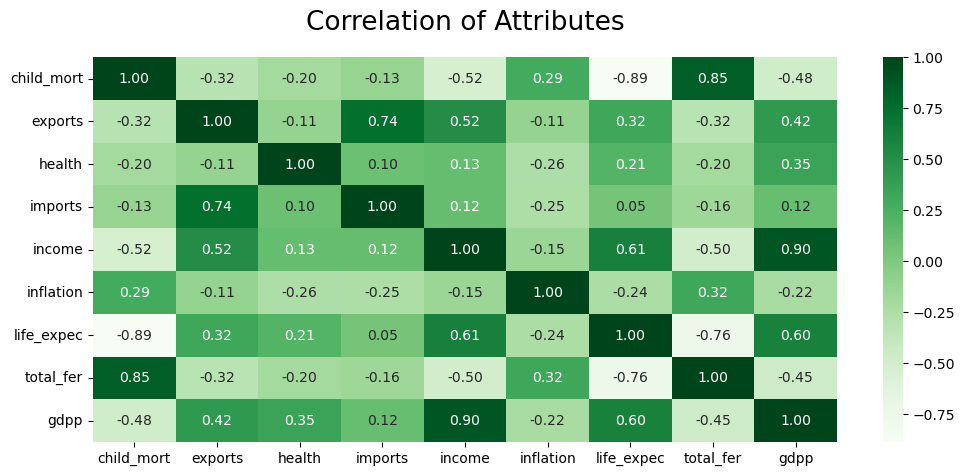

In [9]:
# correlation analysis

plt.figure(figsize = (12,5))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df2.corr(), cmap='Greens',annot=True, fmt='.2f')
plt.show()

In [10]:
df2.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [11]:
######   Data Analysis

In [12]:
# for numerical features (all features in df2, are numerical):

numerical = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
for column in numerical:
    fig = px.box(df2, x=df2[column])
    fig.show()

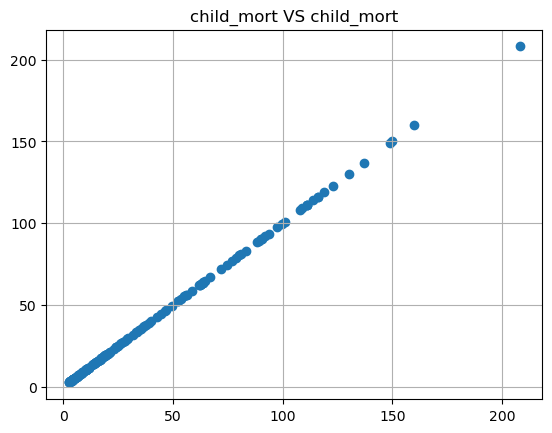

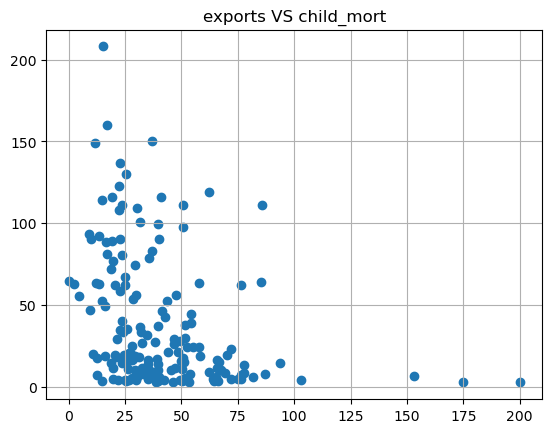

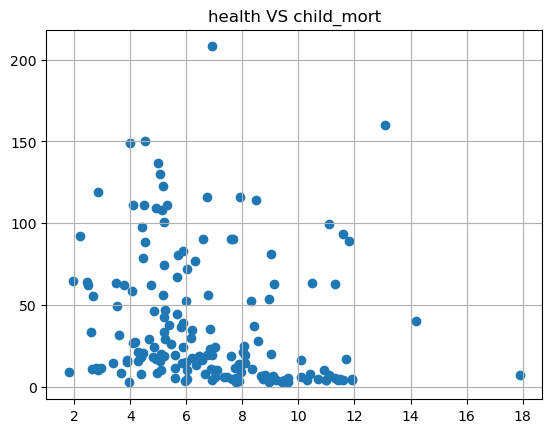

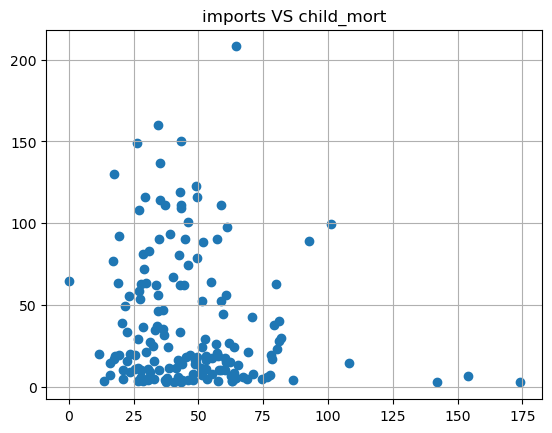

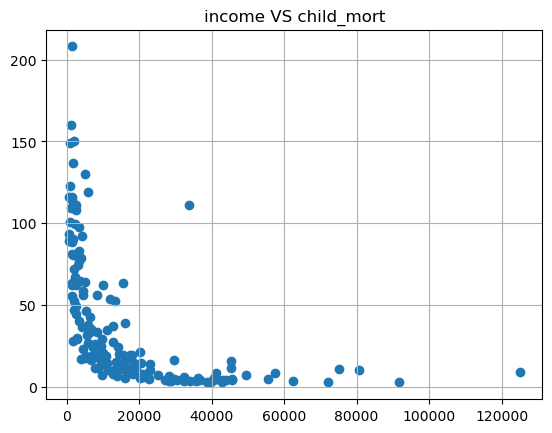

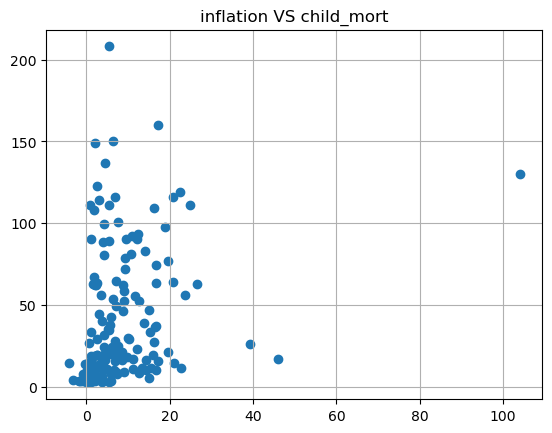

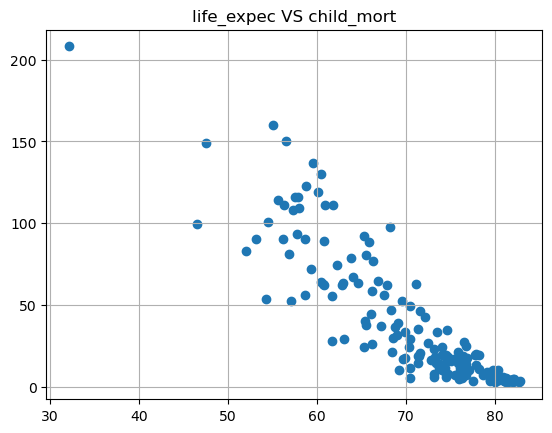

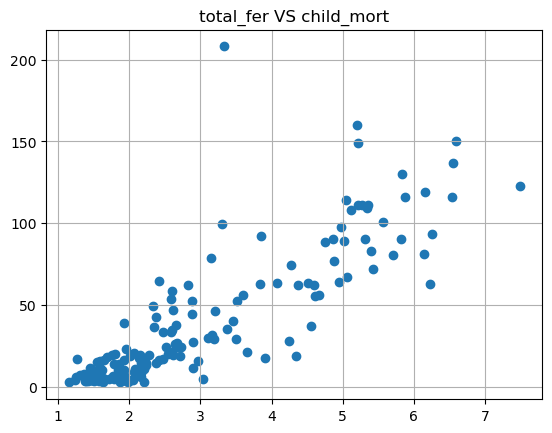

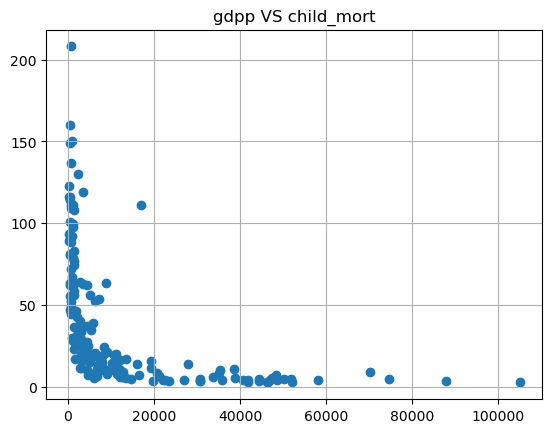

In [13]:
# we can analysis outliers used by 'box plots' (above) & 'scatter plots' (below) 

for col in df2.columns : 
    plt.scatter(df2[col], df2["child_mort"])
    plt.title(col + ' VS child_mort')
    plt.grid()
    plt.show()

In [14]:
# these are outliers :

out1 = df2[df2['child_mort'] > 148]
out2 = df2[df2['exports'] > 90]
out3 = df2[df2['health'] > 14]
out4 = df2[df2['imports'] > 140]
out5 = df2[df2['income'] > 120000]
out6 = df2[df2['inflation'] > 30]
out7 = df2[df2['life_expec'] < 50]
out8 = df2[df2['total_fer'] > 7]
out9 = df2[df2['gdpp'] > 60000]


outliers = pd.concat([out1, out2, out3, out4, out5, out6, out7, out8, out9])     # make a dataframe from outliers
outliers

child_mort  exports  health  imports  income  inflation  life_expec  \
31        149.0     11.8    3.98     26.5     888      2.010        47.5   
32        150.0     36.8    4.53     43.5    1930      6.390        56.5   
66        208.0     15.3    6.91     64.7    1500      5.450        32.1   
132       160.0     16.8   13.10     34.5    1220     17.200        55.0   
73          4.2    103.0    9.19     86.5   45700     -3.220        80.4   
91          2.8    175.0    7.77    142.0   91700      3.620        81.3   
98          6.8    153.0    8.65    154.0   28300      3.830        80.3   
131        14.4     93.8    3.40    108.0   20400     -4.210        73.4   
133         2.8    200.0    3.96    174.0   72100     -0.046        82.7   
101        40.0     23.5   14.20     81.0    3340      3.800        65.4   
159         7.3     12.4   17.90     15.8   49400      1.220        78.7   
91          2.8    175.0    7.77    142.0   91700      3.620        81.3   
98          6.8    153.0    8.65    154.0   28300      3.830        80.3   
133         2.8    200.0    3.96    174.0   72100     -0.046        82.7   
123         9.0     62.3    1.81     23.8  125000      6.980        79.5   
103        26.1     46.7    5.44     56.7    7710     39.200        66.2   
113       130.0     25.3    5.07     17.4    5150    104.000        60.5   
163        17.1     28.5    4.91     17.6   16500     45.900        75.4   
31        149.0     11.8    3.98     26.5     888      2.010        47.5   
66        208.0     15.3    6.91     64.7    1500      5.450        32.1   
87         99.7     39.4   11.10    101.0    2380      4.150        46.5   
112       123.0     22.2    5.16     49.1     814      2.550        58.8   
91          2.8    175.0    7.77    142.0   91700      3.620        81.3   
114         3.2     39.7    9.48     28.5   62300      5.950        81.0   
123         9.0     62.3    1.81     23.8  125000      6.980        79.5   
145         4.5     64.0   11.50     53.3   55500      0.317        82.2   

     total_fer    gdpp  
31        5.21     446  
32        6.59     897  
66        3.33     662  
132       5.20     399  
73        2.05   48700  
91        1.63  105000  
98        1.36   21100  
131       2.17   10800  
133       1.15   46600  
101       3.46    2860  
159       1.93   48400  
91        1.63  105000  
98        1.36   21100  
133       1.15   46600  
123       2.07   70300  
103       2.64    2650  
113       5.84    2330  
163       2.47   13500  
31        5.21     446  
66        3.33     662  
87        3.30    1170  
112       7.49     348  
91        1.63  105000  
114       1.95   87800  
123       2.07   70300  
145       1.52   74600

In [15]:
######   Modeling   ######

In [16]:
#### K-mean     by  Outliers

In [17]:
# Set some initial values
kmeans_set = {"init":"random", "n_init":10,"max_iter":300,"random_state":42}

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2)

In [19]:
scaled_dataframe = pd.DataFrame(scaled_features, columns=df2.columns)  # Create a new dataframe with scaled values.

List = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)  # The ** syntax is used to unpack the dictionary.
    kmeans.fit(scaled_dataframe)
    List.append(kmeans.inertia_)
    
k = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
k.elbow

4

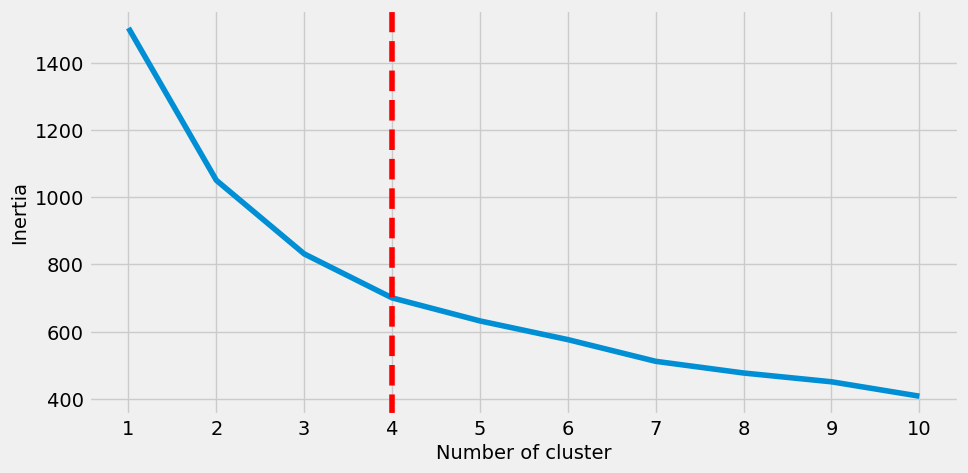

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
plt.plot(range(1, 11), List)
plt.xticks(range(1, 11))
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.axvline(x=k.elbow, color='r', label="anxline - full height", ls='--')
plt.show()

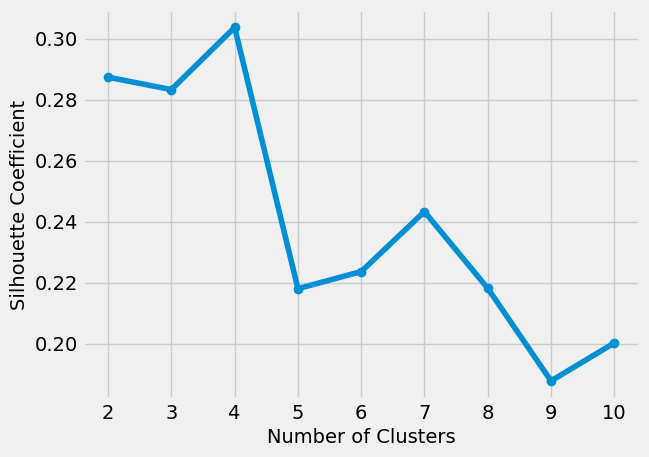

In [21]:
silhouette_coefficients = []                 # holds the silhouette coefficients for each k
for k in range(2,11):                        # Note that you have to start with 2 clusters for the silhouette coefficien.
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_dataframe)
    score = silhouette_score(scaled_dataframe, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

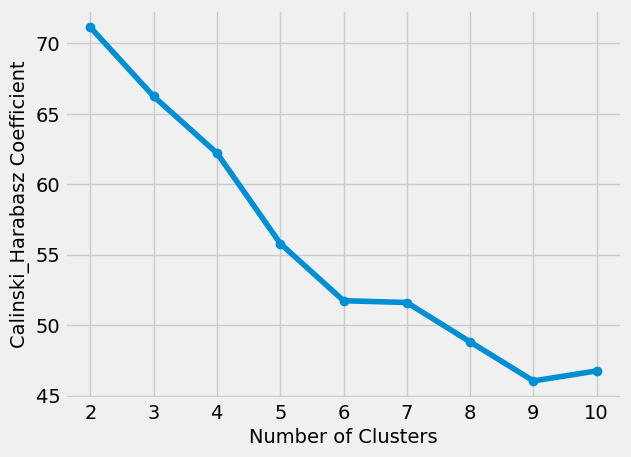

In [22]:
calinski_Harabasz_coefs = []   # holds the calinski_Harabaz coefficients for each k
for k in range(2,11):          # Note that you have to start with 2 clusters for the Calinski_Harabasz Coefficient.
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_dataframe)
    score = calinski_harabasz_score(scaled_dataframe, kmeans.labels_)
    calinski_Harabasz_coefs.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), calinski_Harabasz_coefs, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski_Harabasz Coefficient")
plt.show()

[[-8.49003244e-01  4.93567278e+00 -8.16303241e-03  4.54805768e+00
   2.43954240e+00 -5.04206141e-01  1.22682431e+00 -1.03886271e+00
   2.44079735e+00]
 [ 1.36021776e+00 -4.37533128e-01 -1.55984012e-01 -1.89203770e-01
  -6.86894080e-01  4.02110776e-01 -1.28217981e+00  1.36494385e+00
  -6.04242430e-01]
 [-8.22940855e-01  1.83308008e-01  8.29894098e-01 -2.61252058e-01
   1.39837771e+00 -4.99856230e-01  1.07433094e+00 -7.68250332e-01
   1.59543611e+00]
 [-4.12342560e-01 -1.28020671e-03 -2.25892629e-01  4.24525884e-02
  -2.32737556e-01 -1.63669262e-02  2.61216331e-01 -4.28844264e-01
  -3.52670040e-01]]


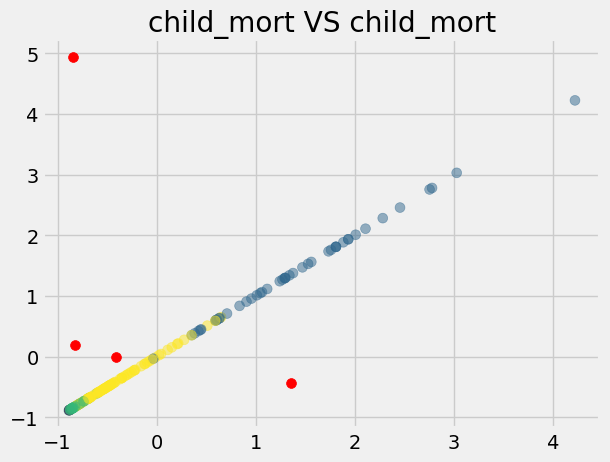

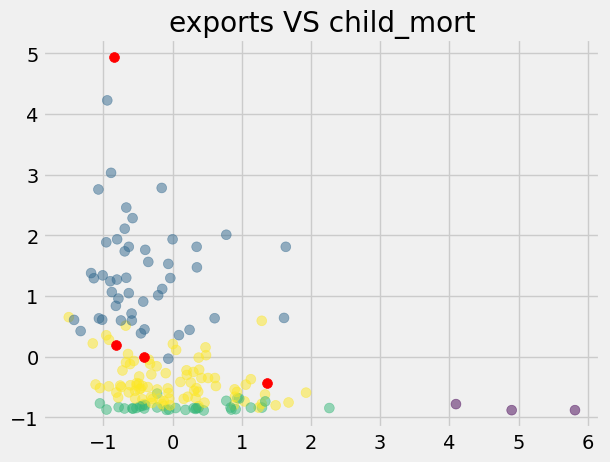

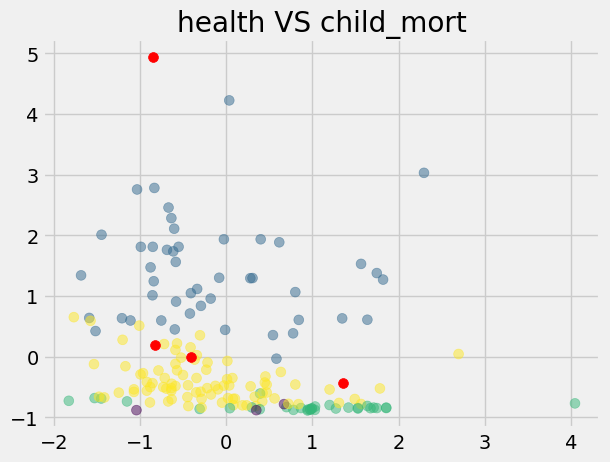

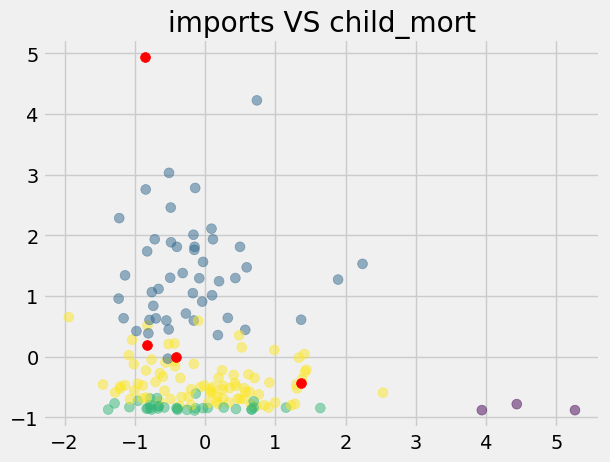

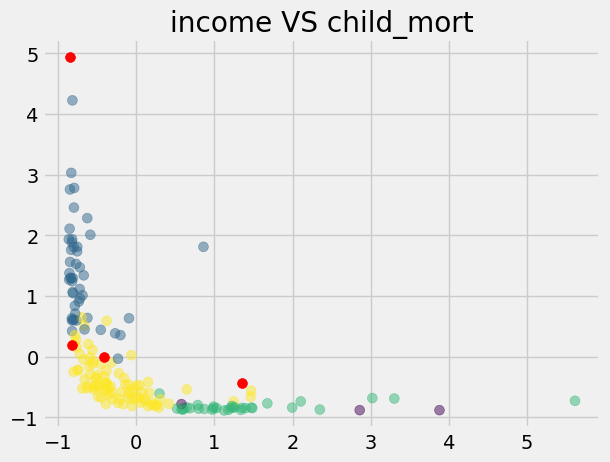

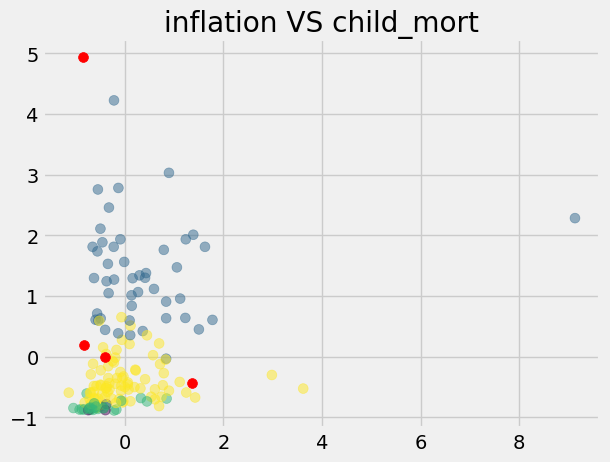

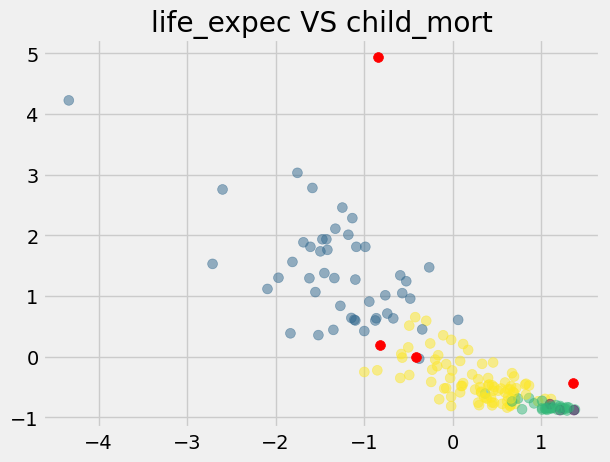

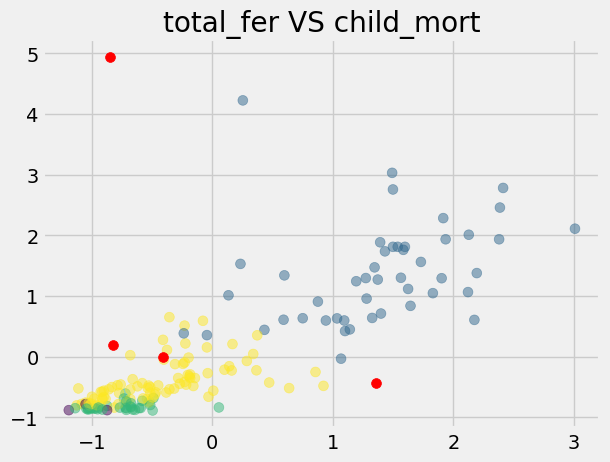

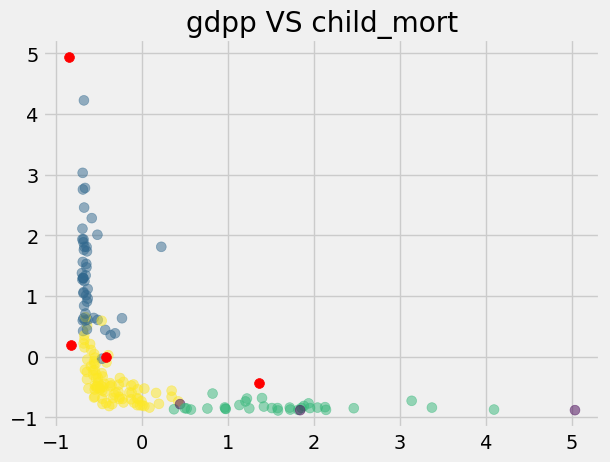

In [23]:
# finally n_cluster = 4 is the best

kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_features)
centroids = kmeans.cluster_centers_
print(centroids)

for column in scaled_dataframe.columns : 
    plt.scatter(scaled_dataframe[column], scaled_dataframe["child_mort"], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:,0], centroids[:,1], c = 'red', s=50)   
    plt.title(column + ' VS child_mort')
    plt.show()

In [24]:
# visualization of clusters

labels=kmeans.labels_
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  
0       9.44        56.2       5.82    553        1  
1       4.49        76.3       1.65   4090        3  
2      16.10        76.5       2.89   4460        3  
3      22.40        60.1       6.16   3530        1  
4       1.44        76.8       2.13  12200        3

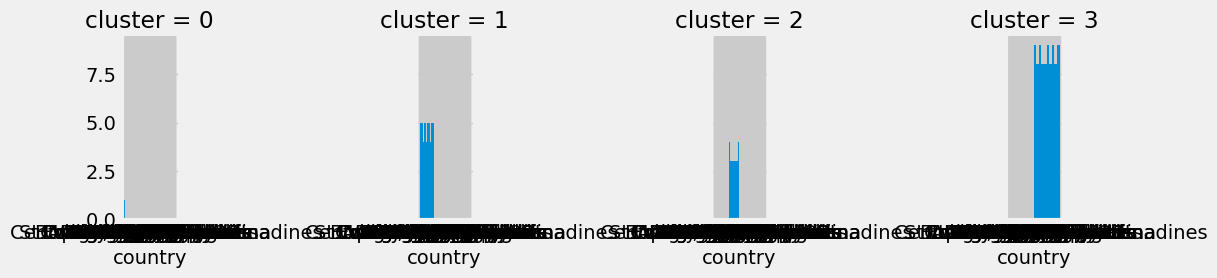

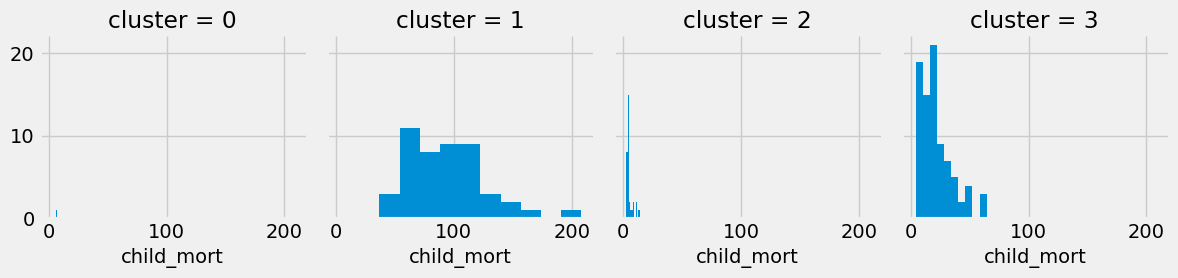

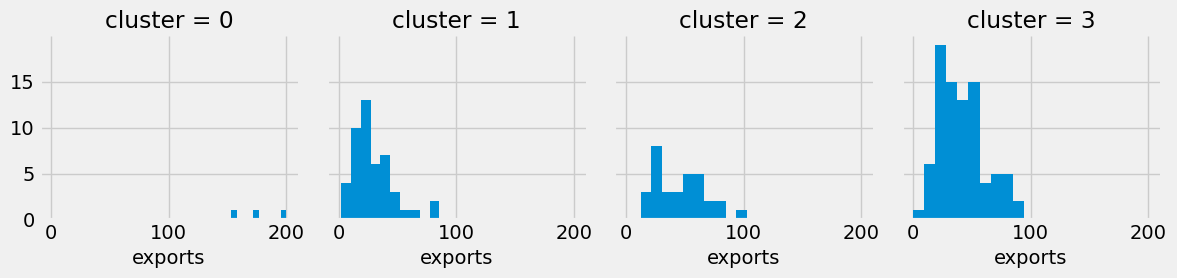

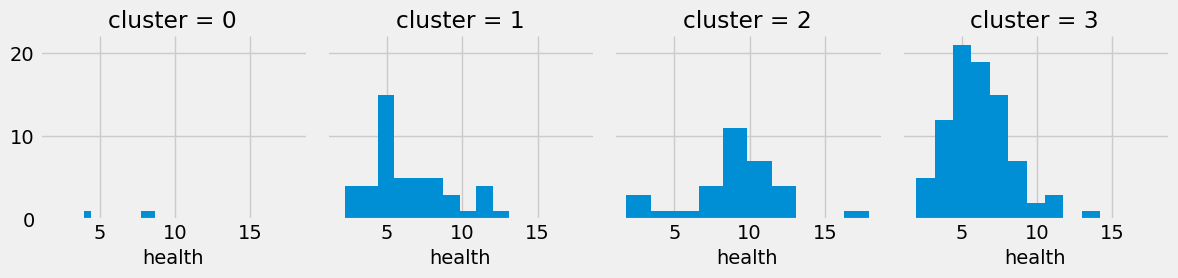

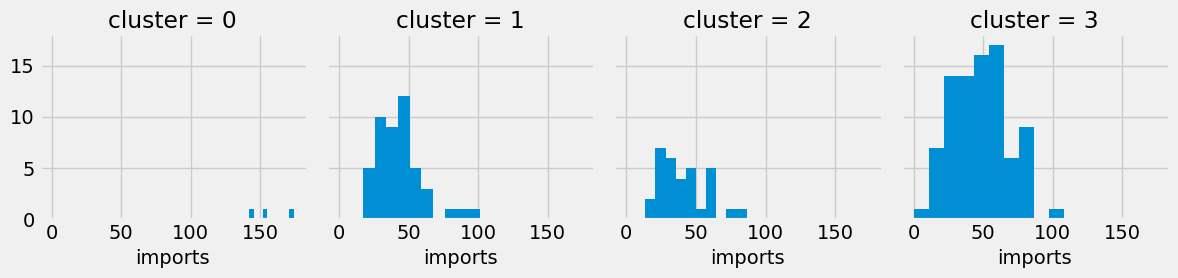

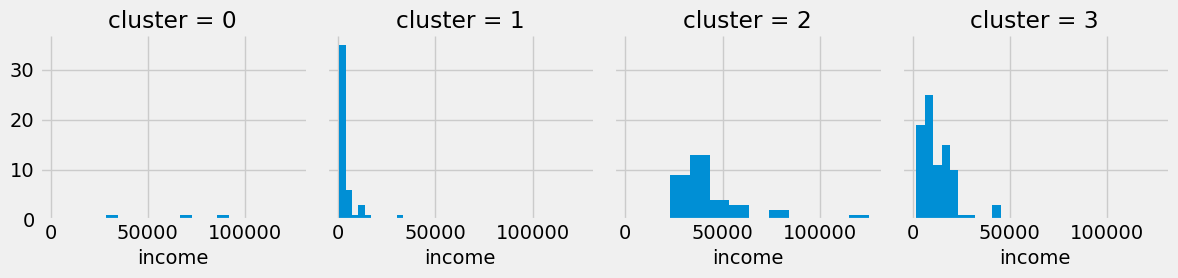

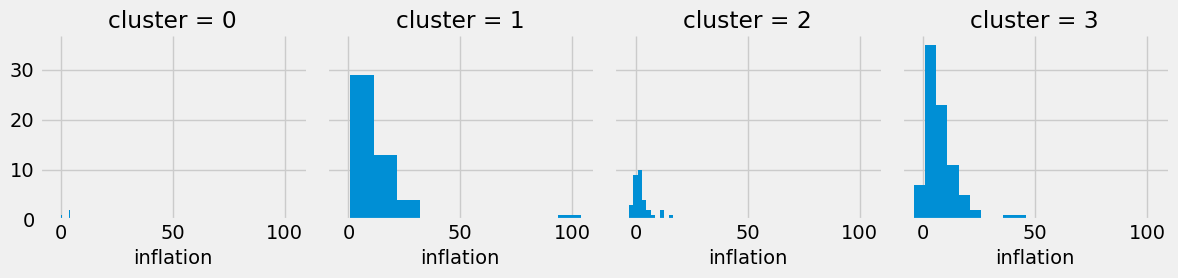

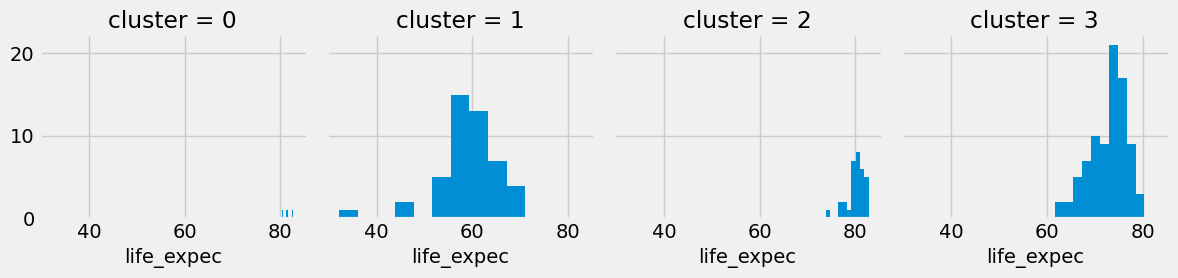

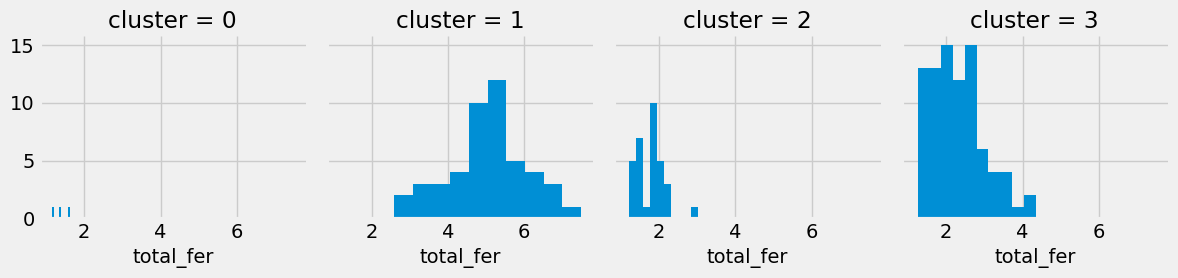

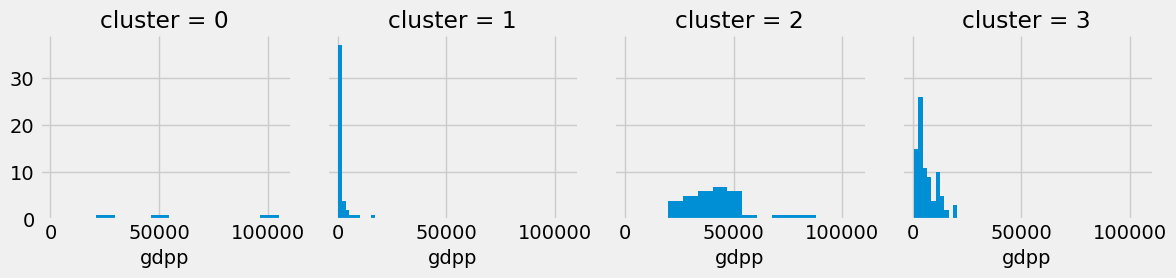

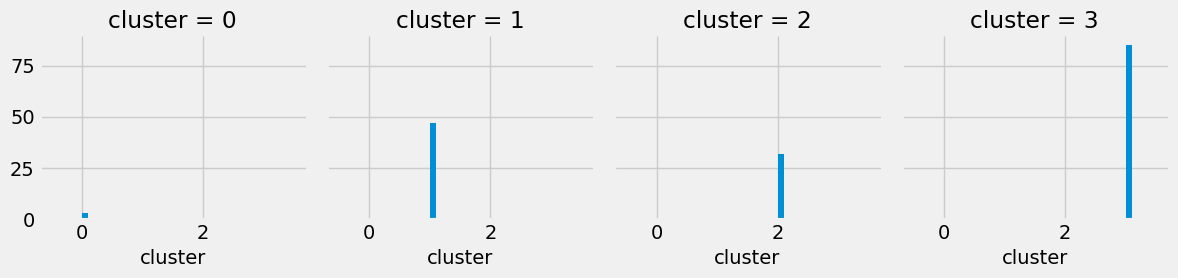

In [25]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [26]:
# as can be seen, these clustering are not suitable, because one cluster has been dedicated for outliers(cluster=0)
# so it is better to have a model without outliers

In [27]:
#  go for outliers

df_without_out = df2.copy()      # make a copy from base dataframe

In [28]:
df_without_out.drop(index=outliers.index, inplace=True)    # creat a dataframe without outliers
df_without_out.reset_index(inplace=True, drop=True)
df_without_out

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
143        36.3     31.7    5.81     28.5    4240      16.50        68.8   
144        29.2     46.6    5.25     52.7    2950       2.62        63.0   
145        23.3     72.0    6.84     80.2    4490      12.10        73.1   
146        56.3     30.0    5.18     34.4    4480      23.60        67.5   
147        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
143       2.34   1380  
144       3.50   2970  
145       1.95   1310  
146       4.67   1310  
147       5.40   1460  

[148 rows x 9 columns]

In [29]:
scaler2 = StandardScaler()
scaled_features2 = scaler2.fit_transform(df_without_out)

scaled_dataframe2 = pd.DataFrame(scaled_features2, columns=df_without_out.columns)  # Create a new dataframe with scaled values.

List2 = []
for k in range(1, 11):
    kmeans2 = KMeans(n_clusters=k, **kmeans_set)  # The ** syntax is used to unpack the dictionary.
    kmeans2.fit(scaled_dataframe2)
    List2.append(kmeans2.inertia_)
    
k2 = KneeLocator(range(1,11), List2, curve='convex', direction='decreasing')
k2.elbow

3

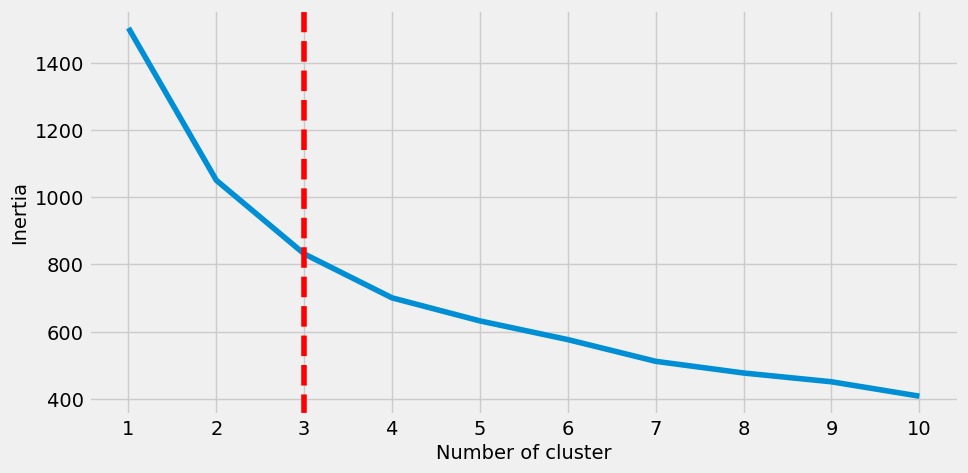

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 5))
plt.plot(range(1, 11), List)
plt.xticks(range(1, 11))
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.axvline(x=k2.elbow, color='r', label="anxline - full height", ls='--')
plt.show()

In [31]:
### The best value of k using this method is equal to 3.

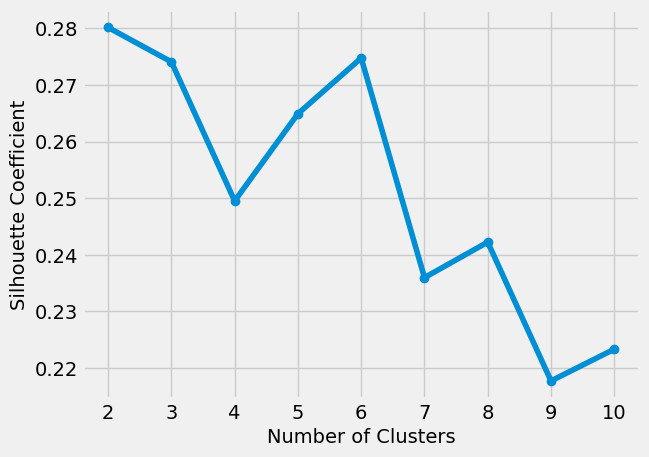

In [32]:
silhouette_coefficients2 = []                 # holds the silhouette coefficients for each k
for k in range(2,11):                        # Note that you have to start with 2 clusters for the silhouette coefficien.
    kmeans2 = KMeans(n_clusters=k, **kmeans_set)
    kmeans2.fit(scaled_dataframe2)
    score2 = silhouette_score(scaled_dataframe2, kmeans2.labels_)
    silhouette_coefficients2.append(score2)
    
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients2, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [33]:
###   The best value of k using this method is equal to 3.

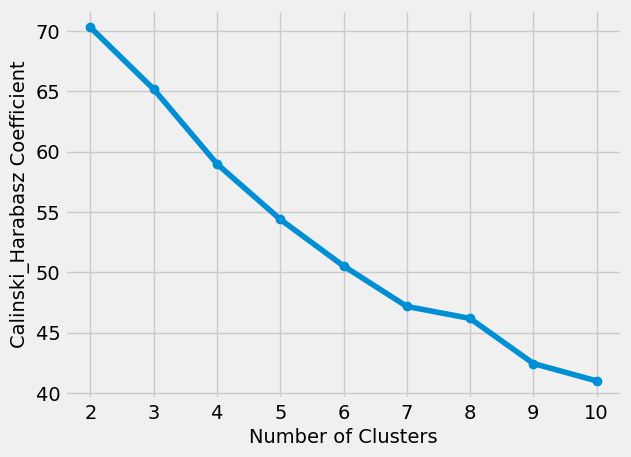

In [34]:
calinski_Harabasz_coefs2 = []   # holds the calinski_Harabaz coefficients for each k
for k in range(2,11):          # Note that you have to start with 2 clusters for the Calinski_Harabasz Coefficient.
    kmeans2 = KMeans(n_clusters=k, **kmeans_set)
    kmeans2.fit(scaled_dataframe2)
    score2 = calinski_harabasz_score(scaled_dataframe2, kmeans2.labels_)
    calinski_Harabasz_coefs2.append(score2)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), calinski_Harabasz_coefs2, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski_Harabasz Coefficient")
plt.show()

In [35]:
### The best value of k using this method is equal to 3.

[[ 1.34824272 -0.51660106 -0.24530035 -0.22457011 -0.74155084  0.54096582
  -1.24636214  1.27221066 -0.64185446]
 [-0.45820747  0.19184456 -0.17632148  0.2057391  -0.14206041 -0.06075093
   0.30164375 -0.45102996 -0.30166078]
 [-0.89039645  0.29475614  0.90259145 -0.22077133  1.61358848 -0.70832127
   1.17086538 -0.78696154  1.90627689]]


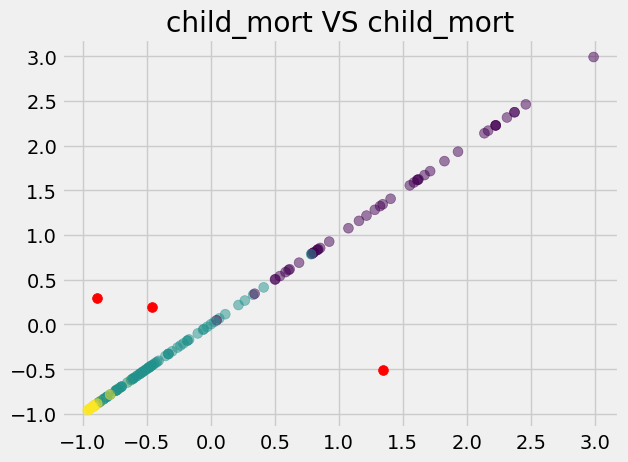

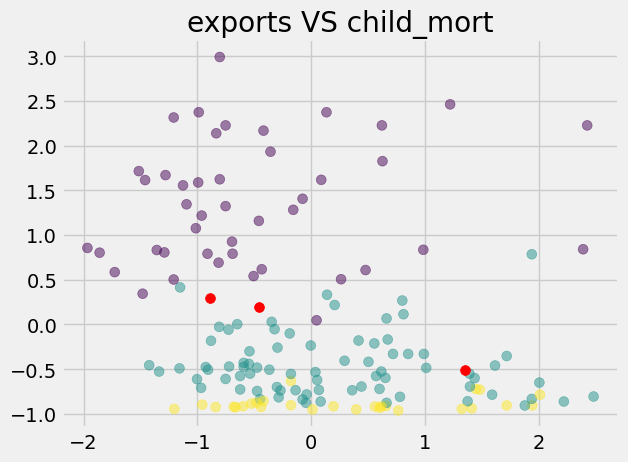

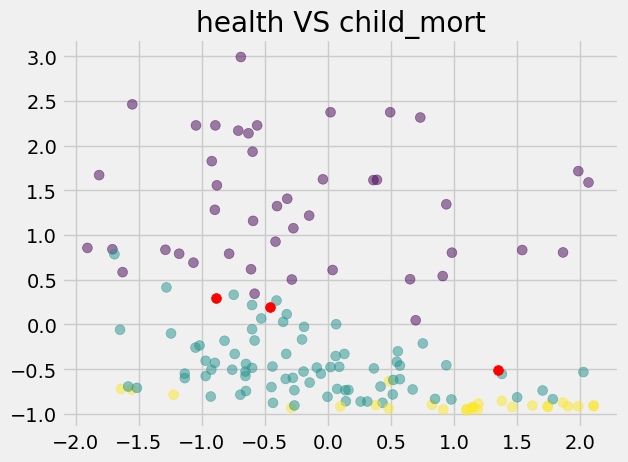

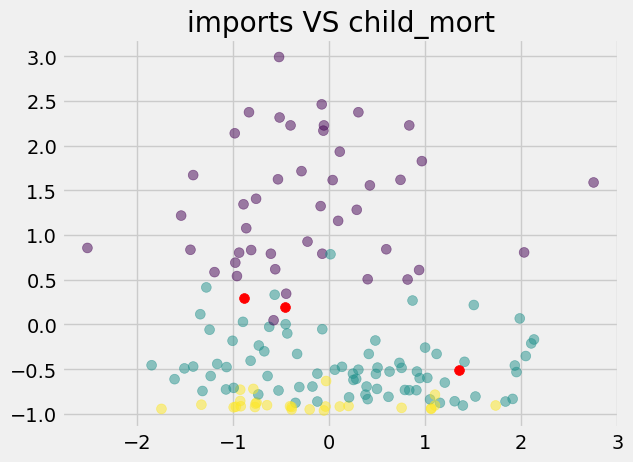

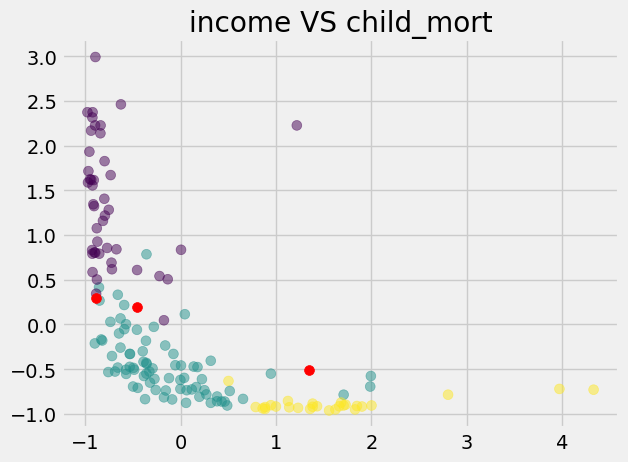

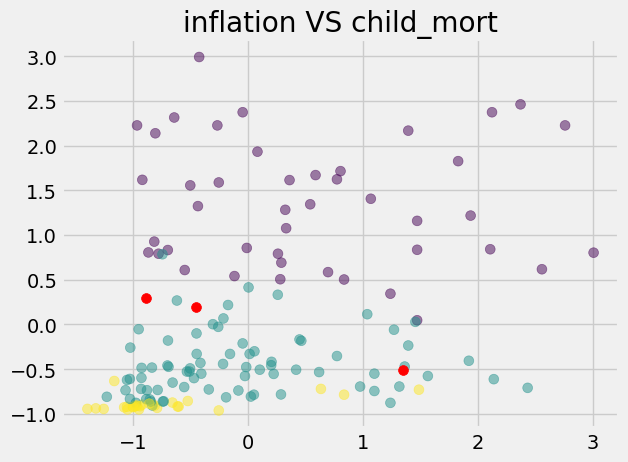

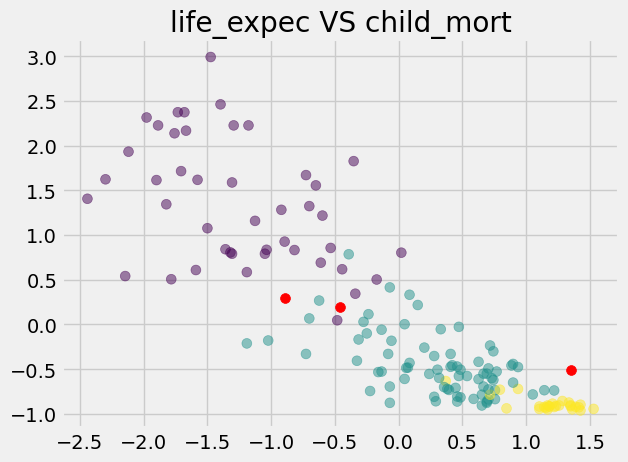

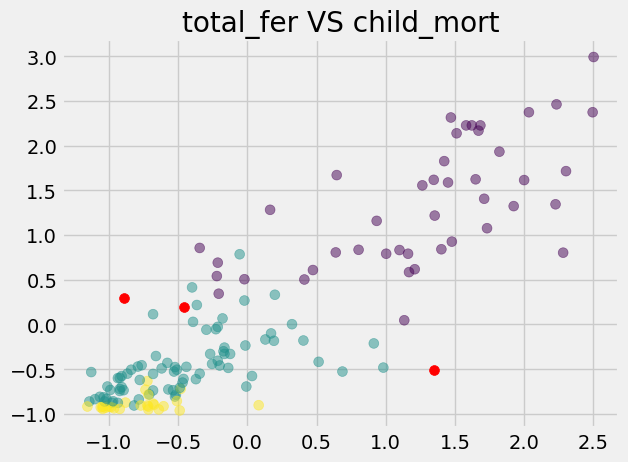

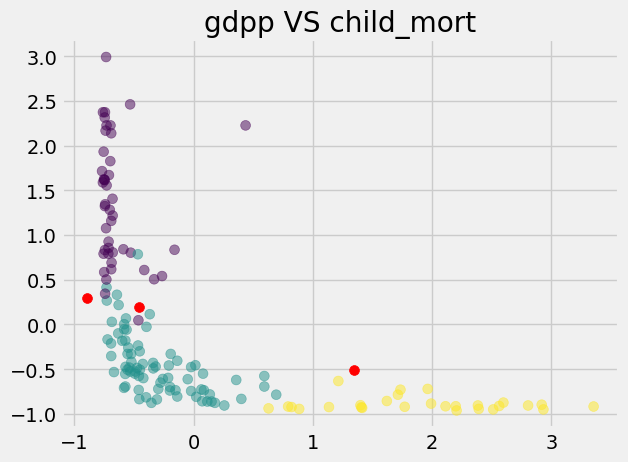

In [36]:
# finally n_cluster = 3 is the best

kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(scaled_features2)
centroids2 = kmeans2.cluster_centers_
print(centroids2)

for column in scaled_dataframe2.columns : 
    plt.scatter(scaled_dataframe2[column], scaled_dataframe2["child_mort"], c = kmeans2.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids2[:,0], centroids2[:,1], c = 'red', s=50)   
    plt.title(column + ' VS child_mort')
    plt.show()

In [37]:
# visualization of clusters

In [38]:
labels2 = kmeans2.labels_
clusters2=pd.concat([df, pd.DataFrame({'cluster':labels2})], axis=1)
clusters2.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  
0       9.44        56.2       5.82    553      0.0  
1       4.49        76.3       1.65   4090      1.0  
2      16.10        76.5       2.89   4460      1.0  
3      22.40        60.1       6.16   3530      0.0  
4       1.44        76.8       2.13  12200      1.0

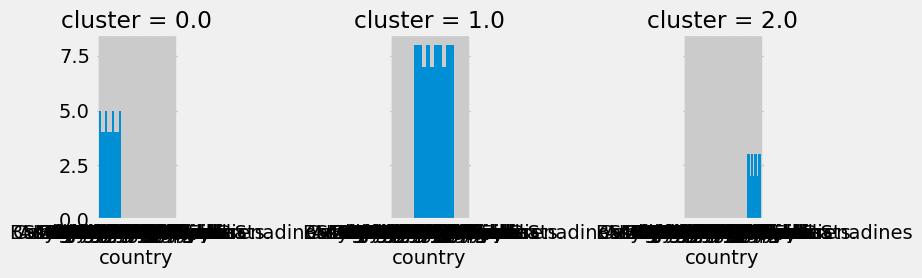

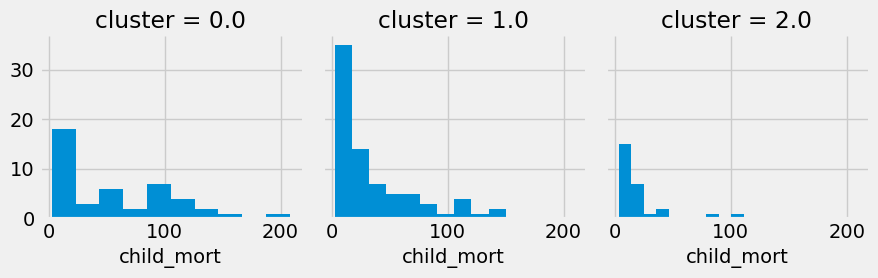

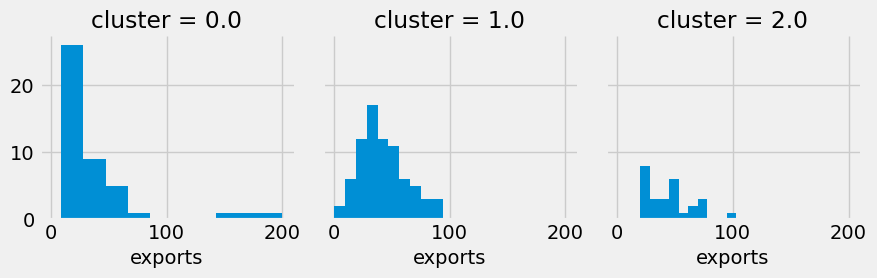

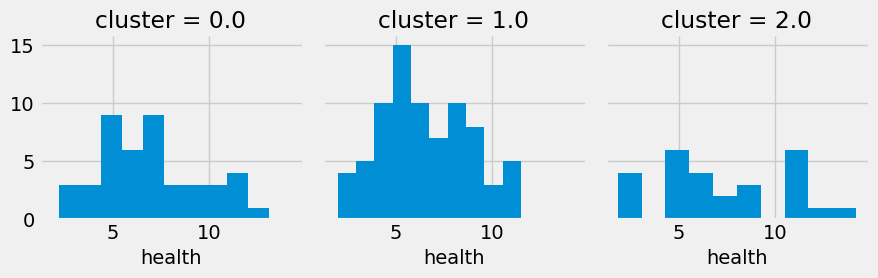

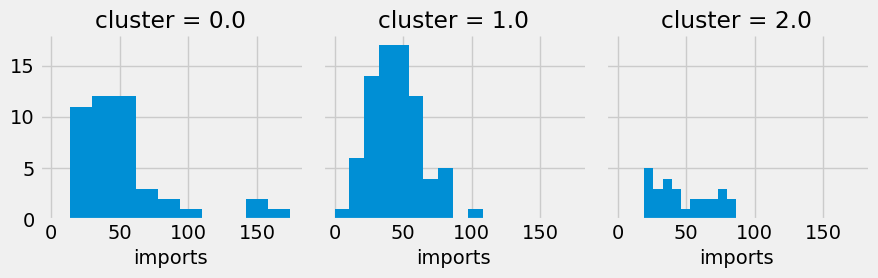

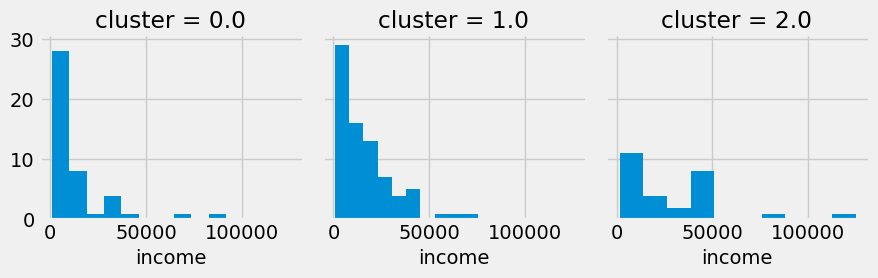

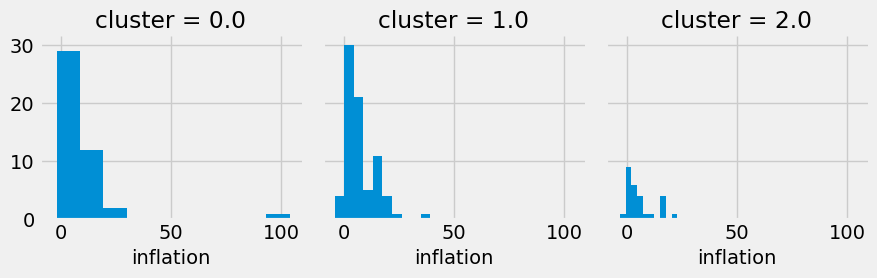

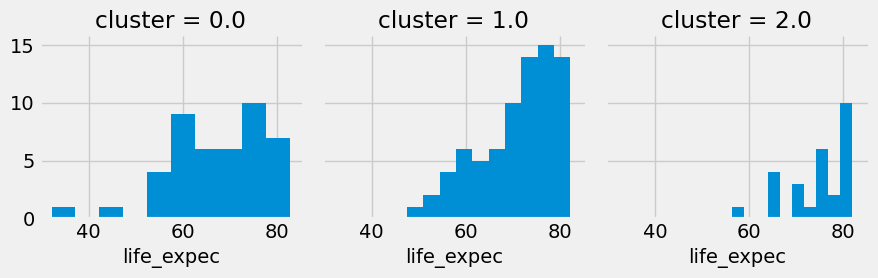

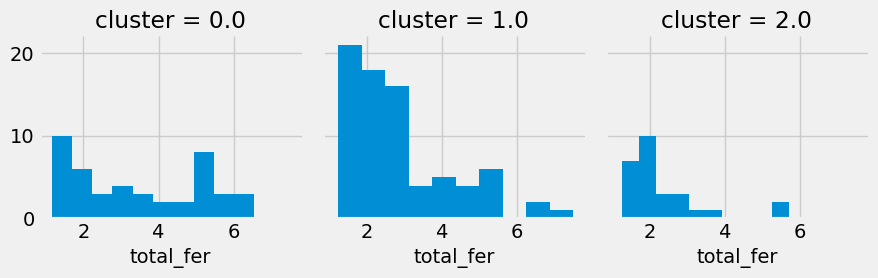

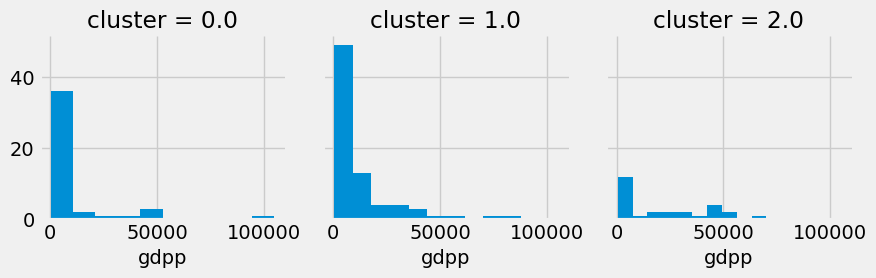

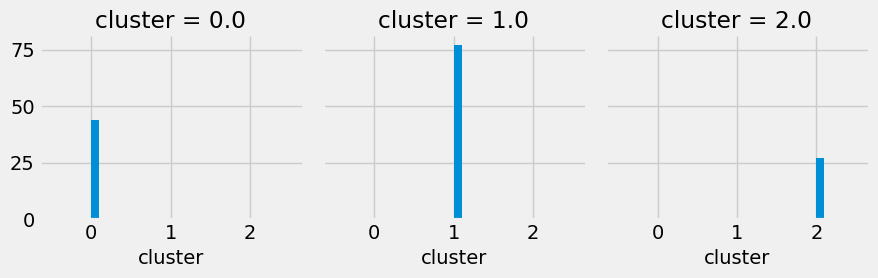

In [39]:
for c in clusters2:
    grid= sns.FacetGrid(clusters2, col='cluster')
    grid.map(plt.hist, c)

In [40]:
# PCA

dist2 = 1 - cosine_similarity(scaled_features2)

pca2 = PCA(2)
pca2.fit(dist2)
scaled_features2_PCA = pca2.transform(dist2)
scaled_features2_PCA.shape

(148, 2)

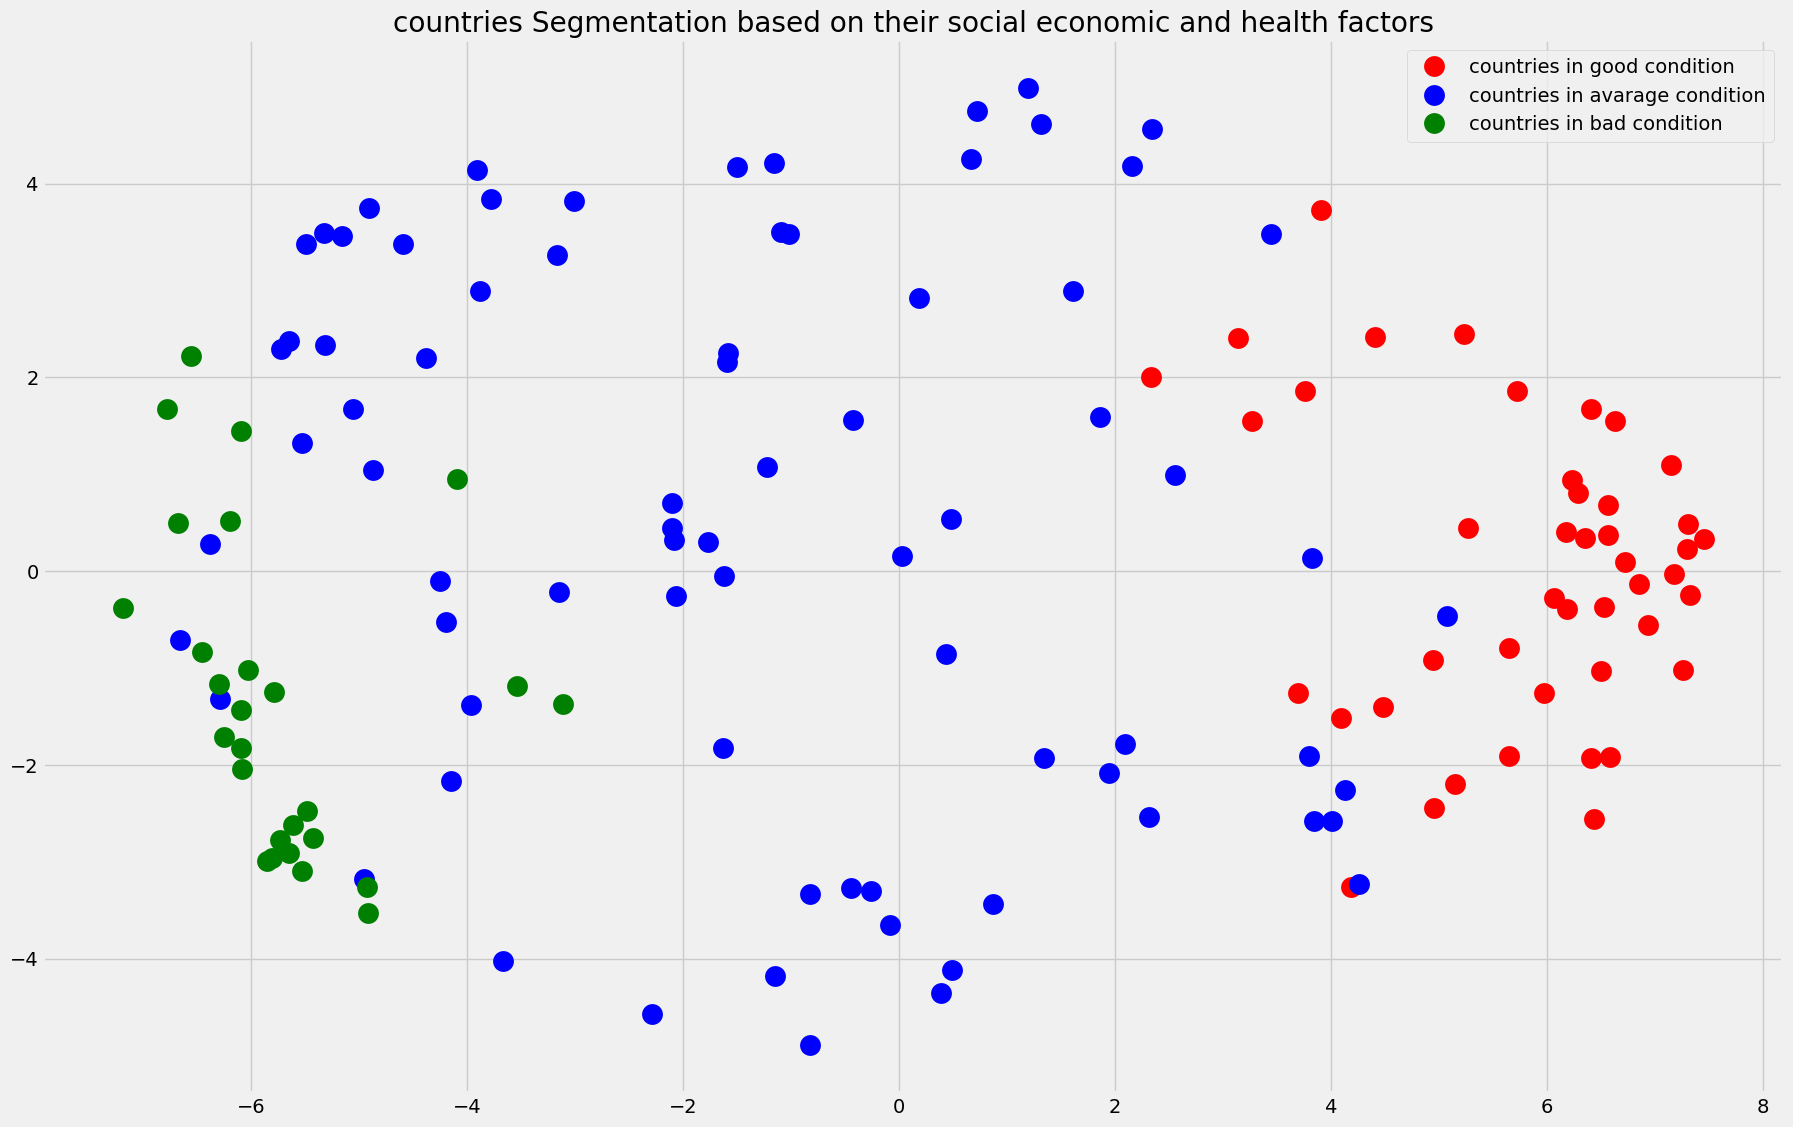

In [41]:
# we need to identify backward countries based on social economic and health factors.

x, y = scaled_features2_PCA[:, 0], scaled_features2_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green'}

names = {0: 'countries in good condition' ,        #  which have ("child_mort", "inflation", "total_fer", "gdpp") less & ("life_expec", "income") more 
         1: 'countries in avarage condition',     # which have ("export", "import") more
         2: 'countries in bad condition'}         #  which have ("child_mort", "total_fer") more & ("gdpp", "income") less 
  
df3 = pd.DataFrame({'x': x, 'y':y, 'label':labels2}) 
groups = df3.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=15,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("countries Segmentation based on their social economic and health factors")
plt.show()

In [42]:
clusters2[clusters2.cluster == 0].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'China', 'Colombia', 'Comoros',
       'Congo, Rep.', 'Egypt', 'El Salvador', 'Finland', 'France',
       'Georgia', 'Grenada', 'Guatemala', 'Haiti', 'India', 'Jamaica',
       'Japan', 'Kenya', 'Kyrgyz Republic', 'Lesotho', 'Liberia',
       'Luxembourg', 'Macedonia, FYR', 'Mali', 'Malta', 'Mauritania',
       'Mauritius', 'Montenegro', 'Nigeria', 'Pakistan', 'Poland',
       'Rwanda', 'Senegal', 'Serbia', 'Sierra Leone', 'Singapore',
       'South Korea', 'Tajikistan', 'Tanzania'], dtype=object)

In [43]:
clusters2[clusters2.cluster == 1].country.values

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'Congo, Dem. Rep.',
       'Costa Rica', 'Czech Republic', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Ghana',
       'Greece', 'Guinea', 'Guinea-Bissau', 'Hungary', 'Iceland', 'Iraq',
       'Israel', 'Italy', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Lao',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mongolia', 'Morocco', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'New Zealand', 'Niger', 'Norway',
       'Oman', 'Panama', 'Paraguay', 'Philippines', 'Romania', 'Russia',
       'Samoa', 'Seychelles', 'Slovak Republic', 'Slovenia',
       'Solomon Islands', 'South 

In [44]:
clusters2[clusters2.cluster == 2].country.values

array(['Australia', 'Austria', 'Bahamas', 'Belgium', 'Brunei', 'Canada',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Estonia', 'Fiji', 'Gambia',
       'Germany', 'Guyana', 'Indonesia', 'Iran', 'Ireland', 'Jordan',
       'Micronesia, Fed. Sts.', 'Moldova', 'Netherlands', 'Peru',
       'Portugal', 'Qatar', 'Saudi Arabia', 'Sri Lanka',
       'St. Vincent and the Grenadines'], dtype=object)